In [ ]:
DROP TABLE IF EXISTS Leave_Record;


DROP TABLE IF EXISTS Employee;
DROP TABLE IF EXISTS Department;
CREATE TABLE Department (
        Dept_Code INTEGER PRIMARY KEY,
        Dept_Name VARCHAR2(100) NOT NULL
    );
 CREATE TABLE Employee (
        Emp_Code INTEGER PRIMARY KEY,
        Emp_Name VARCHAR2(100) NOT NULL CHECK (Emp_Name = UPPER(Emp_Name)),
        Address VARCHAR2(100),
        City VARCHAR2(100),
        Basic_Salary REAL NOT NULL CHECK (Basic_Salary BETWEEN 50000 AND 90000),
        Date_of_Join DATE DEFAULT CURRENT_DATE,
        Grade VARCHAR2(100) CHECK (Grade IN ('A', 'B', 'C')),
        Dept_Code INTEGER,
        CONSTRAINT fk_dept FOREIGN KEY (Dept_Code) 
            REFERENCES Department(Dept_Code) 
    );
     CREATE TABLE Leave_Record (
        Leave_ID INTEGER PRIMARY KEY,
        Emp_Code INTEGER,
        Leave_Type VARCHAR2(100) CHECK (Leave_Type IN ('CL', 'EL', 'ML')),
        From_Date DATE NOT NULL,
        To_Date DATE NOT NULL,
        CONSTRAINT fk_emp FOREIGN KEY (Emp_Code) 
            REFERENCES EMPLOYEE(Emp_Code) 
            ON DELETE CASCADE
    );
    INSERT INTO Department VALUES (1, 'IT'), (2, 'HR'), (3, 'Finance');
    INSERT INTO Employee (Emp_Code, Emp_Name, Address, City, Basic_Salary, Grade, Dept_Code) 
    VALUES 
    (101, 'SWAPNAMOY', '123 Salt Lake', 'Kolkata', 60000, 'A', 1),
    (102, 'KRISTIDHAR', '456 Garia', 'Kolkata', 70000, 'B', 2),
    (103, 'SHAHIR', '789 Jadavpur', 'Kolkata', 75000, 'C', 3),
    (104, 'ABHI', '123 Ballygunge', 'Kolkata', 80000, 'A', 1);
INSERT INTO Leave_Record (Leave_ID, Emp_Code, Leave_Type, From_Date, To_Date)
VALUES (1, 101, 'CL', TO_DATE('2025-03-20', 'YYYY-MM-DD'), TO_DATE('2025-03-22', 'YYYY-MM-DD'));
-- QUERY database
--SELECT * FROM Department;
--SELECT * FROM Employee;
--SELECT * FROM Leave_Record;

#### Question 1

In [ ]:
DECLARE
    v_Emp_Code Employee.Emp_Code%TYPE; -- Variable for input
    v_Emp_Name Employee.Emp_Name%TYPE; -- Variable for employee name
BEGIN
    -- Accept employee code input
    v_Emp_Code := &Enter_Emp_Code;

    -- Query to find employee name
    SELECT Emp_Name INTO v_Emp_Name
    FROM Employee
    WHERE Emp_Code = v_Emp_Code;

    -- If found, display employee name
    DBMS_OUTPUT.PUT_LINE('Employee Name: ' || v_Emp_Name);

EXCEPTION
    WHEN NO_DATA_FOUND THEN
        -- If no record found, display message
        DBMS_OUTPUT.PUT_LINE('Employee not found.');
END;
/

#### Question 2

In [ ]:
DECLARE
    v_Emp_Code Employee.Emp_Code%TYPE := 105; 
    v_Dept_Code Department.Dept_Code%TYPE := 1; 
    v_Count INTEGER;
BEGIN
    -- Check for duplicate Emp_Code
    SELECT COUNT(*) INTO v_Count
    FROM Employee
    WHERE Emp_Code = v_Emp_Code;

    IF v_Count > 0 THEN
        DBMS_OUTPUT.PUT_LINE('Error: Employee code already exists.');
        RETURN;
    END IF;

    -- Check if Dept_Code exists in DEPT table
    SELECT COUNT(*) INTO v_Count
    FROM Department
    WHERE Dept_Code = v_Dept_Code;

    IF v_Count = 0 THEN
        DBMS_OUTPUT.PUT_LINE('Error: Department code does not exist.');
        RETURN;
    END IF;

    -- Insert the new row if validations pass
    INSERT INTO Employee (Emp_Code, Emp_Name, Address, City, Basic_Salary, Grade, Dept_Code)
    VALUES (v_Emp_Code, 'ABRAR', '123 New Address', 'New City', 50000, 'B', v_Dept_Code);

    DBMS_OUTPUT.PUT_LINE('Row successfully added.');
EXCEPTION
    WHEN OTHERS THEN
        DBMS_OUTPUT.PUT_LINE('An unexpected error occurred: ' || SQLERRM);
END;
/


#### Question 3

In [ ]:
DECLARE
    CURSOR top_employees_cursor IS
        SELECT Emp_Name
        FROM Employee
        ORDER BY Basic_Salary DESC
        FETCH FIRST 5 ROWS ONLY; -- Fetch top 5 employees
    v_Emp_Name Employee.Emp_Name%TYPE;
BEGIN
    DBMS_OUTPUT.PUT_LINE('Top 5 Employees with the Highest Basic Salary:');
    
    FOR employee_record IN top_employees_cursor LOOP
        DBMS_OUTPUT.PUT_LINE(employee_record.Emp_Name);
    END LOOP;
END;
/

#### Question 4

In [ ]:
# The SQL%ROWCOUNT just tells you how many rows were affected by the last DML statement.
DECLARE
    v_Dept_Code Department.Dept_Code%TYPE; -- Variable for user input
    v_Row_Count INTEGER; -- Variable to store the count of deleted rows
BEGIN
    -- Accept department code input
    v_Dept_Code := &Enter_Dept_Code;

    -- Delete rows and store the count
    DELETE FROM Employee
    WHERE Dept_Code = v_Dept_Code;

    v_Row_Count := SQL%ROWCOUNT; -- Get the count of deleted rows

    -- Display the result
    IF v_Row_Count > 0 THEN
        DBMS_OUTPUT.PUT_LINE(v_Row_Count || ' row(s) deleted.');
    ELSE
        DBMS_OUTPUT.PUT_LINE('No rows found for the given department code.');
    END IF;
END;
/


### Question 5 (i)

In [ ]:
DECLARE
    v_Member_ID Member.Member_ID%TYPE := 104;--Input Member ID
    v_Book_ID Book.Book_ID%TYPE := 1;         -- Input Book ID
    v_Serial_Number Book_Copy.Serial_Number%TYPE;          -- Serial Number of the book copy
    v_Max_Books INTEGER;                                   -- Maximum books allowed for the member
    v_Issued_Count INTEGER;     
    v_Random_ID INTEGER;
    -- Number of books already issued
    v_Status Book_Copy.Status%TYPE;                       -- Status of the book copy
BEGIN
    -- Validate if the member exists
    SELECT COUNT(*)
    INTO v_Issued_Count
    FROM Member
    WHERE Member_ID = v_Member_ID;

    IF v_Issued_Count = 0 THEN
        DBMS_OUTPUT.PUT_LINE('Error: Member does not exist.');
        RETURN;
    END IF;

    -- Validate if the book is available
    SELECT Serial_Number, Status
    INTO v_Serial_Number, v_Status
    FROM Book_Copy
    WHERE Book_ID = v_Book_ID AND Status = 'Available'
    FETCH FIRST 1 ROWS ONLY;

    IF v_Status IS NULL THEN
        DBMS_OUTPUT.PUT_LINE('Error: No available copies of the book.');
        RETURN;
    END IF;

    -- Check member's eligibility for issuing books
    SELECT Max_Books
    INTO v_Max_Books
    FROM Student
    WHERE Member_ID = v_Member_ID
    UNION ALL
    SELECT Max_Books
    FROM Faculty
    WHERE Member_ID = v_Member_ID;

    SELECT COUNT(*)
    INTO v_Issued_Count
    FROM Library_Transaction
    WHERE Member_ID = v_Member_ID;

    IF v_Issued_Count >= v_Max_Books THEN
        DBMS_OUTPUT.PUT_LINE('Error: Member has reached the maximum limit of issued books.');
        RETURN;
    END IF;

    -- Issue the book
   v_Random_ID := DBMS_RANDOM.VALUE(1, 10000); -- Generates a random number between 1 and 10000

    INSERT INTO Library_Transaction (Transaction_ID, Member_ID, Book_ID, Serial_Number)
    VALUES (v_Random_ID, v_Member_ID, v_Book_ID, v_Serial_Number);

    INSERT INTO Issue_Transaction (Transaction_ID, DT_Issue, To_Be_Returned_By)
    VALUES (v_Random_ID, SYSDATE, SYSDATE + 7); -- Assuming 7 days return period
    -- Update the status of the book copy
    UPDATE Book_Copy
    SET Status = 'Issued'
    WHERE Book_ID = v_Book_ID AND Serial_Number = v_Serial_Number;

    DBMS_OUTPUT.PUT_LINE('Book issued successfully.');
END;
/


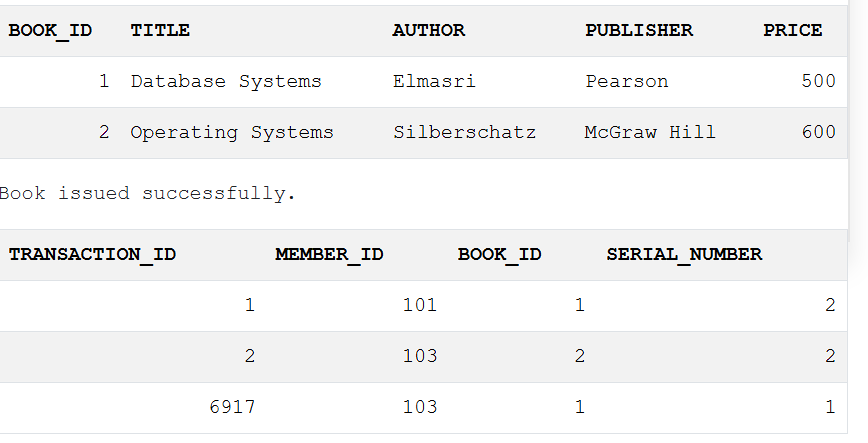

In [1]:
from IPython.display import Image, display

# Provide the full path to your image
image_path = "C:\\Users\\shahi\\Pictures\\Screenshots\\Screenshot 2025-04-15 235918.png"
display(Image(filename=image_path))



### Question 5 (ii)

In [ ]:
SELECT * FROM Return_Transaction;
DECLARE
    v_member_id NUMBER;
    v_book_id NUMBER;
    v_serial_number NUMBER;
    v_transaction_id NUMBER;
    v_issue_count NUMBER;
    v_error EXCEPTION;
BEGIN
    -- Set values for testing (replace with actual user inputs or bind variables as needed)
    v_member_id := 103; -- Member ID
    v_book_id := 2; -- Book ID
    v_serial_number := 2; -- Book copy Serial Number

    -- Check if the book copy was issued to the member
    SELECT COUNT(*)
    INTO v_issue_count
    FROM Library_Transaction
    WHERE Member_ID = v_member_id
    AND Book_ID = v_book_id
    AND Serial_Number = v_serial_number;

    -- If no record found, raise an error
    IF v_issue_count = 0 THEN
        RAISE_APPLICATION_ERROR(-20001, 'This book copy was not issued to the member.');
    ELSE
        -- Fetch the corresponding transaction ID for updating
        SELECT Transaction_ID
        INTO v_transaction_id
        FROM Library_Transaction
        WHERE Member_ID = v_member_id
        AND Book_ID = v_book_id
        AND Serial_Number = v_serial_number;

        -- Process the return transaction
        INSERT INTO Return_Transaction(Transaction_ID, DT_Return)
        VALUES (v_transaction_id, SYSDATE);

        -- Update the Book_Copy table to mark the book copy as 'Available'
        UPDATE Book_Copy
        SET Status = 'Available'
        WHERE Book_ID = v_book_id
        AND Serial_Number = v_serial_number;

        DBMS_OUTPUT.PUT_LINE('Book copy successfully returned.');
    END IF;
EXCEPTION
    WHEN NO_DATA_FOUND THEN
        DBMS_OUTPUT.PUT_LINE('Error: This book copy was not issued to the member.');
    WHEN OTHERS THEN
        DBMS_OUTPUT.PUT_LINE('An unexpected error occurred: ' || SQLERRM);
END;
/
SELECT * FROM Return_Transaction;


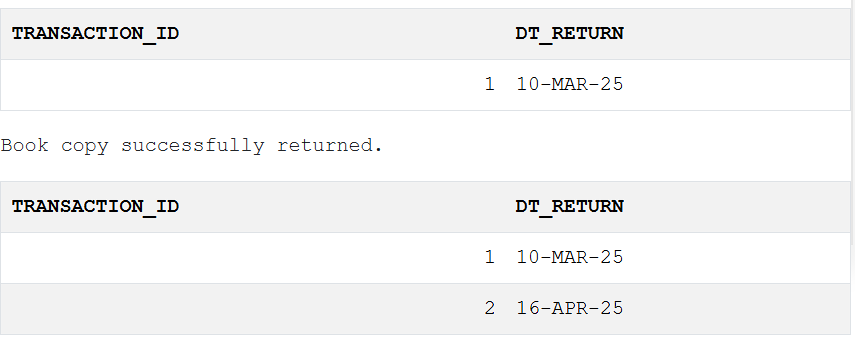

In [3]:
from IPython.display import Image, display

# Provide the full path to your image
image_path = "C:\\Users\\shahi\\Pictures\\Screenshots\\Screenshot 2025-04-16 134353.png"
display(Image(filename=image_path))

### Question 6

In [ ]:
CREATE TABLE LEAVE (
    Emp_No INTEGER NOT NULL,
    Month VARCHAR2(10) NOT NULL,
    No_Of_Days INTEGER NOT NULL
);
INSERT INTO LEAVE (Emp_No, Month, No_Of_Days)
VALUES (101, 'March', 3),
       (102, 'April', 4),
       (103, 'May', 5),
       (104, 'June', 2);
 DECLARE
    v_Emp_No LEAVE.Emp_No%TYPE;
    v_Basic_Salary Employee.Basic_Salary%TYPE;
    v_No_Of_Days LEAVE.No_Of_Days%TYPE;
    v_Days_In_Month INTEGER := 30; -- Assuming 30 days in the current month
    v_Effective_Basic NUMBER;
BEGIN
    -- Cursor to fetch employee details and leave days
    FOR leave_record IN (
        SELECT l.Emp_No, e.Basic_Salary, l.No_Of_Days
        FROM Employee e
        JOIN LEAVE l ON e.Emp_Code = l.Emp_No
    ) LOOP
        v_Emp_No := leave_record.Emp_No;
        v_Basic_Salary := leave_record.Basic_Salary;
        v_No_Of_Days := leave_record.No_Of_Days;

        -- Calculate effective basic salary
        v_Effective_Basic := round(v_Basic_Salary - (v_Basic_Salary * v_No_Of_Days / v_Days_In_Month),2);

        -- Display the result
        DBMS_OUTPUT.PUT_LINE('Emp_No: ' || v_Emp_No || ', Effective Basic Salary: ' || v_Effective_Basic);
    END LOOP;
END;
/

OUTPUT :
Emp_No: 101, Effective Basic Salary: 54000
Emp_No: 102, Effective Basic Salary: 60666.67
Emp_No: 103, Effective Basic Salary: 62500
Emp_No: 104, Effective Basic Salary: 74666.6

### Question 7

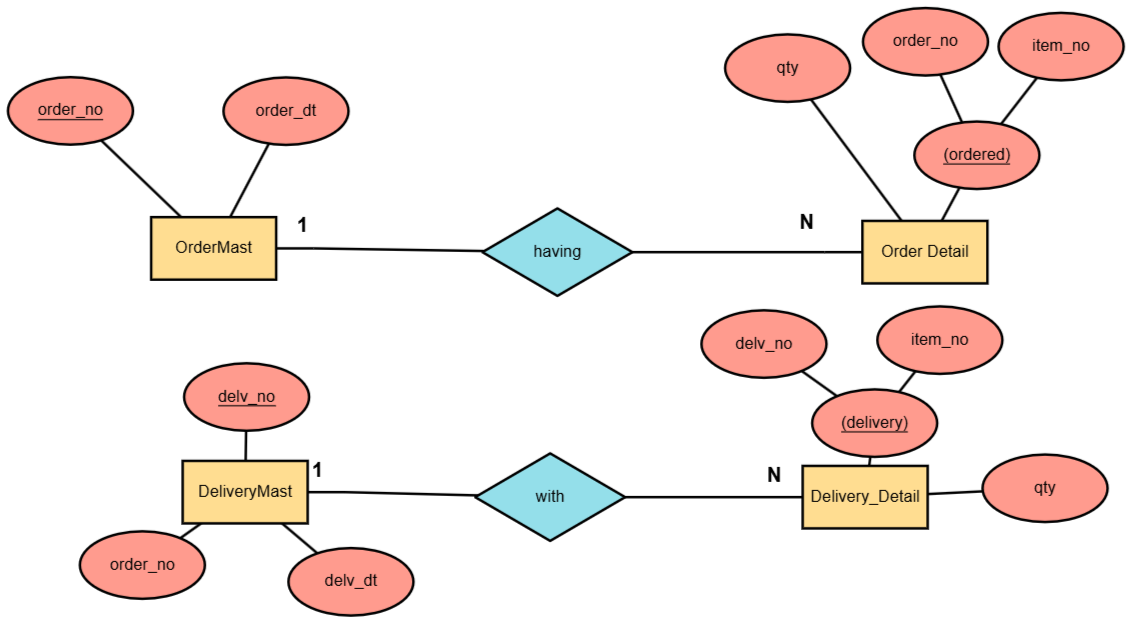

In [4]:
from IPython.display import Image, display

# Provide the full path to your image
image_path = "C:\\Users\\shahi\\Downloads\\ERdiagram.jpg"
display(Image(filename=image_path))

In [ ]:

-- 1. ORDERMAST
CREATE TABLE ORDERMAST (
    ORDER_NO   CHAR(5) PRIMARY KEY,
    ORDER_DT   DATE
);

-- 2. ORDERDETAILS
CREATE TABLE ORDERDETAILS (
    ORDER_NO   CHAR(5),
    ITEM_NO    CHAR(5),
    QTY        NUMBER,
    PRIMARY KEY (ORDER_NO, ITEM_NO),
    FOREIGN KEY (ORDER_NO) REFERENCES ORDERMAST(ORDER_NO)
);

-- 3. DELIVERYMAST
CREATE TABLE DELIVERYMAST (
    DELV_NO    CHAR(5) PRIMARY KEY,
    ORDER_NO   CHAR(5),
    DELV_DT    DATE,
    FOREIGN KEY (ORDER_NO) REFERENCES ORDERMAST(ORDER_NO)
);

-- 4. DELIVERY_DETAILS
CREATE TABLE DELIVERY_DETAILS (
    DELV_NO    CHAR(5),
    ITEM_NO    CHAR(5),
    QTY        NUMBER,
    PRIMARY KEY (DELV_NO, ITEM_NO),
    FOREIGN KEY (DELV_NO) REFERENCES DELIVERYMAST(DELV_NO)
);



-- QUERY database
SELECT * FROM ORDERMAST;
DECLARE
    v_start_date DATE := TO_DATE('&Start_Date', 'YYYY-MM-DD');
    v_end_date   DATE := TO_DATE('&End_Date', 'YYYY-MM-DD');

    CURSOR pending_cursor IS
        SELECT 
            o.ORDER_NO,
            d.ITEM_NO,
            d.QTY AS ORDERED_QTY,
            NVL((
                SELECT SUM(dd.QTY)
                FROM DELIVERYMAST dm
                JOIN DELIVERY_DETAILS dd ON dm.DELV_NO = dd.DELV_NO
                WHERE dm.ORDER_NO = o.ORDER_NO
                  AND dd.ITEM_NO = d.ITEM_NO
            ), 0) AS DELIVERED_QTY
        FROM ORDERMAST o
        JOIN ORDERDETAILS d ON o.ORDER_NO = d.ORDER_NO
        WHERE o.ORDER_DT BETWEEN v_start_date AND v_end_date;

BEGIN
    DBMS_OUTPUT.PUT_LINE('Pending Deliveries Between ' || TO_CHAR(v_start_date, 'YYYY-MM-DD') || ' and ' || TO_CHAR(v_end_date, 'YYYY-MM-DD'));
    DBMS_OUTPUT.PUT_LINE('-------------------------------------------------------------');

    FOR rec IN pending_cursor LOOP
        IF rec.ORDERED_QTY > rec.DELIVERED_QTY THEN
            DBMS_OUTPUT.PUT_LINE('Order No: ' || rec.ORDER_NO ||
                                 ' | Item No: ' || rec.ITEM_NO ||
                                 ' | Ordered: ' || rec.ORDERED_QTY ||
                                 ' | Delivered: ' || rec.DELIVERED_QTY ||
                                 ' | Pending: ' || (rec.ORDERED_QTY - rec.DELIVERED_QTY));
        END IF;
    END LOOP;
END;
/


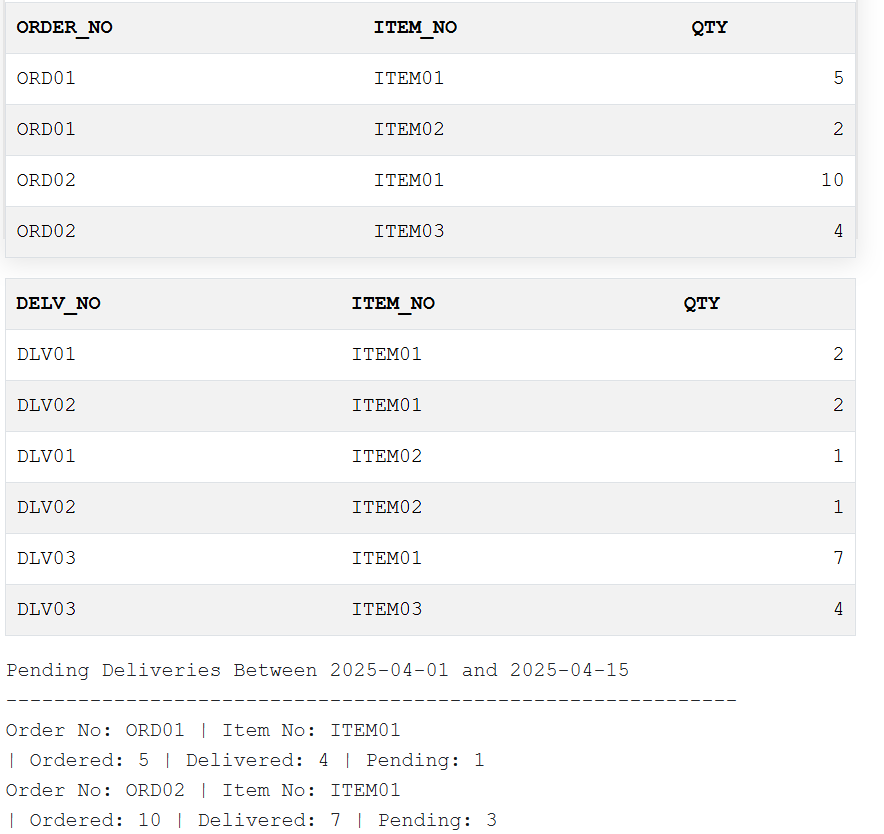

In [2]:
from IPython.display import Image, display

# Provide the full path to your image
image_path = "C:\\Users\\shahi\\Pictures\\Screenshots\\Screenshot 2025-04-16 215340.png"
display(Image(filename=image_path))